In [5]:
# for data analysis
import pandas as pd 
import numpy as np

# for data visuals
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

# for machine learning 
from sklearn.ensemble import RandomForestClassifier as RFclassifier
from sklearn.neighbors import KNeighborsClassifier as KNclassifier 
from sklearn.svm import SVC as SVMclassifier
from sklearn.naive_bayes import GaussianNB as NBclassifier
from sklearn.preprocessing import MinMaxScaler

### Step 1: Reading data


In [6]:
trainData = pd.read_csv('processed_cleveland_data_train.csv')
testData = pd.read_csv('processed_cleveland_data_test.csv')


def replace_predict(df):
    df['num'] = df['num'].replace([1, 2, 3, 4, 5, 6], 1)
# replacing anything greater than 1 with 1 because it is a binary classification problem

       
replace_predict(trainData)
replace_predict(testData)

scaler = MinMaxScaler(feature_range=(0, 1))

Xtrain = trainData.drop(['num'], axis=1)
Ytrain = trainData['num']


Xtest = testData.drop(['num'], axis=1)
Ytest = testData['num']

Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)





/Users/Sahithi/.conda/envs/dlenv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/Sahithi/.conda/envs/dlenv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [7]:

#sns.barplot(x='chol', y='num', palette="rocket", data=trainData)


#### the train and test data sets are further seprated by thier features and the predicted diagnosis

In [8]:

# Xtrain = trainData.drop(['num'], axis=1)
# Ytrain = trainData['num']

# Xtest = testData.drop(['num'], axis=1)
# Ytest = testData['num']

# print(Xtest.head(0))

In [9]:
# print(Xtrain)
# Xtrain = Xtrain.T
# Ytrain = Ytrain.T
# Xtest = Xtest.T
# Ytest = Ytest.T
# print("transposed")
# print(Xtrain)

### Step 2: Define the model
 

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
# Create all the models

rfModel=RFclassifier()
knModel= KNclassifier()
svmModel= SVMclassifier()
nbModel=NBclassifier()

#ifModel=IFclassifier()
# rtModel=RTclassifier()
#voModel= VOclassifier(50)


# Choose parameters for all model
# rfparameters = {'n_estimators': [4,6,9,13,18],
#              'max_features': ['log2', 'sqrt', 'auto'],
#              'criterion': ['entropy', 'gini'],
#              'max_depth': [1,16,32,32,26],
#              'min_samples_split': [2, 3, 5, 8,12],
#              'min_samples_leaf': [1, 2, 8, 10, 15]}
# # adparameters = {'n_estimators': [10,20,50,60,70],'base_estimator':None, 'learning_rate':[.7,1.,1.5],
#                'algorithm'=’SAMME.R’, 'random_state'=None}
# bgparameters = {'n_estimators': [10,20,50,60,70,4,6,9,13,18], 
    



### Step 3: Fit the Model

In [11]:
# Fit the best algorithm to the data
rfModel.fit(Xtrain, Ytrain)
knModel.fit(Xtrain, Ytrain)
svmModel.fit(Xtrain, Ytrain)
nbModel.fit(Xtrain, Ytrain)
#ifModel.fit(Xtrain, Ytrain)


/Users/Sahithi/.conda/envs/dlenv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Sahithi/.conda/envs/dlenv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GaussianNB(priors=None, var_smoothing=1e-09)

### Step 5: Evaluate the Model using accuracy score

In [12]:
from sklearn.metrics import confusion_matrix
finalaccu=[]
predictionsAr=[]
probabilities=[]
models=[rfModel,knModel,svmModel,nbModel]
count=0
while count<4:
    predictions = models[count].predict(Xtest)
    #probs = models[count].predict_proba(Xtest)
    print(models[count])
    print(predictions)
    accuracy= accuracy_score(Ytest, predictions)
    count=count+1
    #probabilities.append(probs)
    finalaccu.append(accuracy)
    predictionsAr.append(predictions)
print(finalaccu)
#print(predictionsAr)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
[0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0
 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 0]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
[0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0
 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0]
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, proba

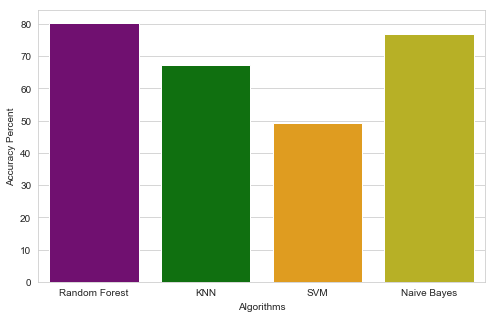

In [13]:
methods =  ["Random Forest","KNN", "SVM", "Naive Bayes"]
accuracy = [80.33, 67.21, 49.18, 77.04]
colors = ["purple", "green", "orange", "#CFC60E"]

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy Percent")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

### Confusion Matrix


In [14]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(Ytest,predictionsAr[1])
cm_svm = confusion_matrix(Ytest,predictionsAr[2])
cm_nb = confusion_matrix(Ytest,predictionsAr[3])
cm_rf = confusion_matrix(Ytest,predictionsAr[0])

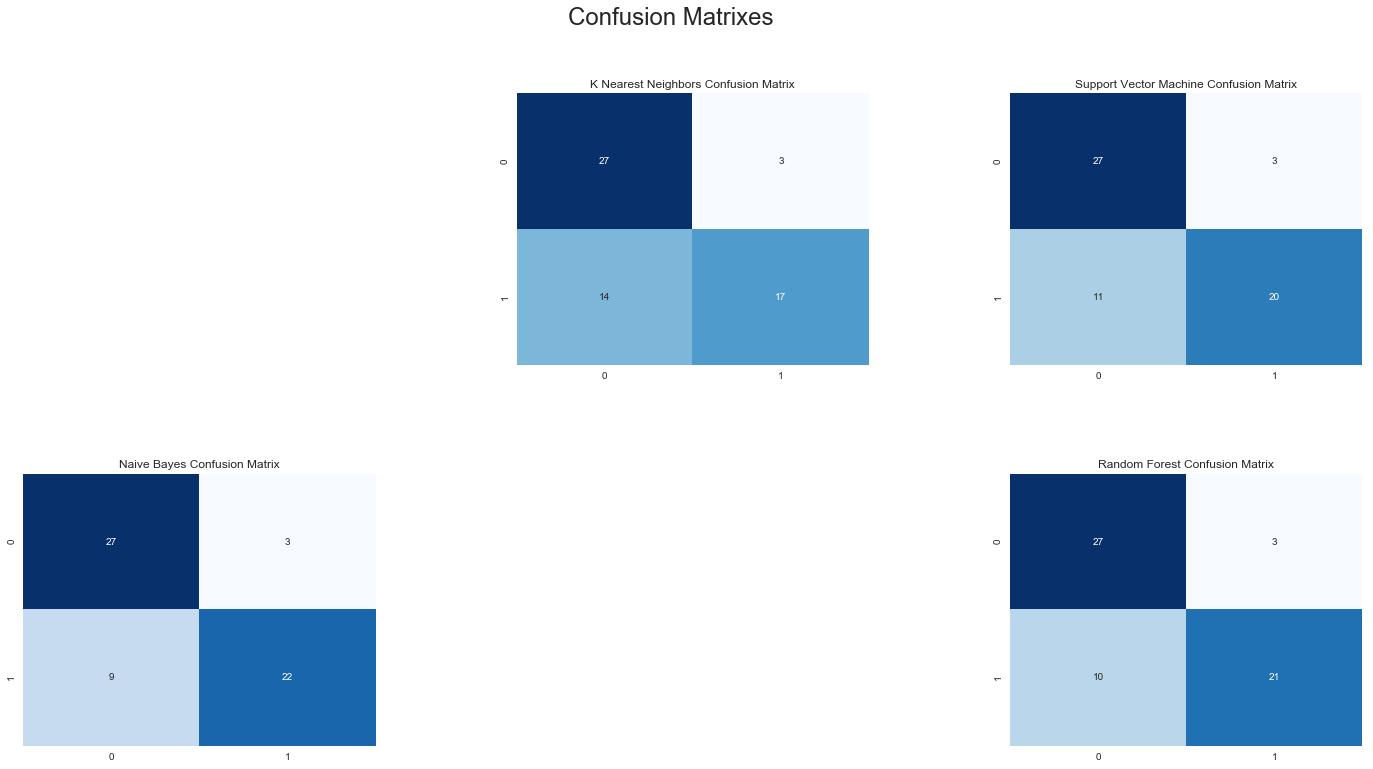

In [25]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)


plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

### ROC and AUC 

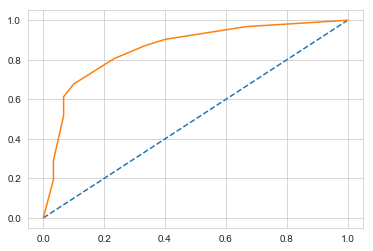

0.8575268817204301


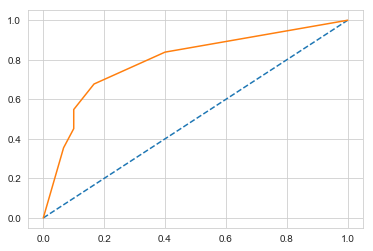

0.7946236559139785


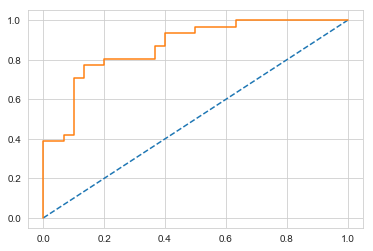

0.8677419354838709


In [24]:
# roc curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score


#RANDOM FOREST
probs = rfModel.predict_proba(Xtest)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Ytest, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr)
# show the plot
pyplot.show()
#calulate ROC AUC score
loss = roc_auc_score(Ytest, probs)
print(loss)


#KNN
probs = knModel.predict_proba(Xtest)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Ytest, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr)
# show the plot
pyplot.show()
#calulate ROC AUC score
loss = roc_auc_score(Ytest, probs)
print(loss)

# probs = svmModel.predict_proba(Xtest)
# # keep probabilities for the positive outcome only
# probs = probs[:, 1]
# # calculate roc curve
# fpr, tpr, thresholds = roc_curve(Ytest, probs)
# # plot no skill
# pyplot.plot([0, 1], [0, 1], linestyle='--')
# # plot the roc curve for the model
# pyplot.plot(fpr, tpr)
# # show the plot
# pyplot.show()

#NAIVE BAYES
probs = nbModel.predict_proba(Xtest)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Ytest, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr)
# show the plot
pyplot.show()
#calulate ROC AUC score
loss = roc_auc_score(Ytest, probs)
print(loss)



### Feature Importance Graph

[0.11476971 0.02842754 0.14351625 0.06480732 0.0682701  0.00810536
 0.02337116 0.1090197  0.02324182 0.12078662 0.04469686 0.11001629
 0.14097128]
[ 5  8  6  1 10  3  4  7 11  0  9 12  2]


Text(0.5, 0, 'Relative Importance')

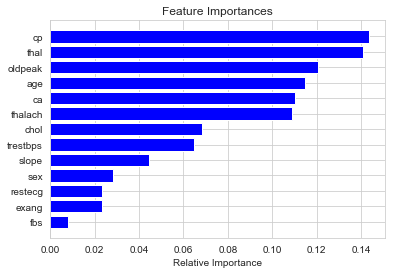

In [23]:
features=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", 
          "thal"]
# count=0
# while count<4:
importances = rfModel.feature_importances_
print(importances)
indices = np.argsort(importances)
print(indices)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
#     count=count+1

### Mathew's Correlation Coeffcient

In [18]:
from sklearn.metrics import matthews_corrcoef
count=0
while count<4:
 matthewsCoeff=matthews_corrcoef(Ytest, predictionsAr[count])   
 count=count+1
 print(matthewsCoeff)


0.5909167880440763
0.47751569933946353
0.5623552691440146
0.6197554148158355


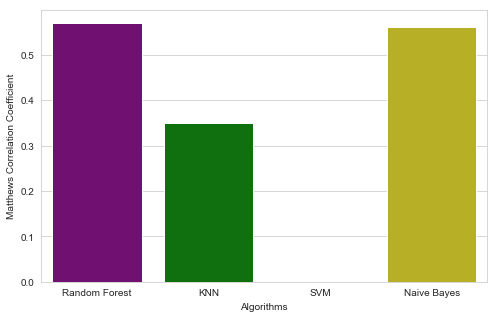

In [22]:
methods =  ["Random Forest","KNN", "SVM", "Naive Bayes"]
MCC = [0.57, 0.35, 0.0, 0.56]
colors = ["purple", "green", "blue", "#CFC60E"]
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
plt.yticks(np.arange(-1,1,0.1))
plt.ylabel("Matthews Correlation Coefficient")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=MCC, palette=colors)
plt.show()

### Step 5: Evaluate Model using confidence and probability

In [20]:
from sklearn.metrics import log_loss
finalconf=[]
models=[rfModel,adModel,bgModel,etModel,gbModel]
count=0
while count<5:
    confidence = models[count].predict_proba(Xtest)
    probs = confidence[:, 1]
    #print(confidence)
    #print(probs)
    #print(Ytest)
    #print(Ytest.shape)
    #print(Ytest.size)
    # calculate log loss
    loss = log_loss(Ytest.values, probs)
    print(loss)
    #print(models[count])
    #print(confidence) 
    #print(Ytest.values)
    count=count+1

NameError: name 'adModel' is not defined

### Step 6: Cross Validation

In [21]:

# Cross Validation with KFold
from sklearn.model_selection import KFold

alldata = pd.read_csv('processed_cleveland_data.csv')
replace_predict(alldata)

Xall = alldata.drop(['num'], axis=1)
Yall = alldata['num']

def run_kfold(model):
    kf = KFold(n_splits=5)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(Xall):
        fold += 1
        Xtrain, Xtest = Xall.values[train_index], Xall.values[test_index]
        Ytrain, Ytest = Yall.values[train_index], Yall.values[test_index]
        model.fit(Xtrain, Ytrain)
        #print (Xtrain.shape)
        #print (Ytrain.shape)
        #print(Xtrain[0])
        print(Ytrain[0])
        predictions = model.predict(Xtest)
        print(predictions)
        accuracy = accuracy_score(Ytest, predictions)
        print(accuracy)
        outcomes.append(accuracy)
        print(outcomes)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        mean_outcome = np.mean(outcomes)
        print("Mean Accuracy: {0}".format(mean_outcome)) 
        
run_kfold(model)
    

NameError: name 'model' is not defined